##Creating a Convnet

###CIFAR 10 Dataset
The problem we will consider here is classifying 10 different everyday objects. It contains 60,000 32x32 color images with 6000 images of each class. 

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck





# Setup and import

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



# Load and split dataset into train and test

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
## Normalizing Train and test images Pixel values between 0 and 1

train_images, test_images  = train_images/255.0, test_images/255.0


In [ ]:
## all the class/labels name

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

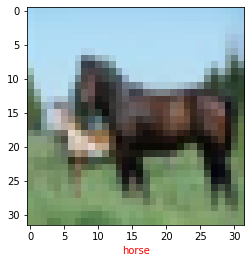

In [ ]:
# check some images

IMG_INDEX = 12

plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]], color = 'r')
plt.show()

# Model create

##CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth (more filter to take out more features).

In [ ]:
# use 3 convo filter and 2 max polling layers 

cnn_model = models.Sequential()

# Convolution filter of size 3x3 and number fo filters = 32, 64, 64
# activation = Relu
# imput image shape = 32x32x3
## so model.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

cnn_model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))

# # max polling filter with size 2x2
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))



In [ ]:
# model summary

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

- conv2d_2 (Conv2D)--> (None, 30, 30, 32) --> output shape is 30x30 instead of 32x32 because we do samplinh wihtout padding so we get 2 pixel less

- also notice that depth of our image increases but the spacial dimensions reduce drastically.

## Classifier layer: Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.

- at the end we have classfier layer (so output of last convo layer will be input of classifier layer)-->  output layer will be fully connected/dense layers 
- we will flatten the output of last convo layer and pass it into classifier (which classfier use, will depend on which loss we are using)
- and activation = 'softmax' to get probability of all classes 



In [ ]:
cnn_model.add(layers.Flatten())

## classfier layers-- will use 2 fully connected layers 
# first fully connected layer
cnn_model.add(layers.Dense(64, activation='relu')) # 64 neurons 

# 2nd fully connected layer 
cnn_model.add(layers.Dense(10)) # 10 neurons as 10 classes 

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, follwed by the final output layer of 10 neurons (one for each class).

## Compile the model with hyprparamterer: loss, optimizer, performance metrices

In [ ]:
cnn_model.compile(optimizer= 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics= ['accuracy'])



# Train CNN model



In [ ]:
# train 

model_training = cnn_model.fit(train_images, train_labels,epochs=10, batch_size=50, validation_data=(test_images, test_labels))


Epoch 1/10
1000/1000 [==============================] - 22s 10ms/step - loss: 1.5539 - accuracy: 0.4351 - val_loss: 1.3311 - val_accuracy: 0.5224
Epoch 2/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.2015 - accuracy: 0.5741 - val_loss: 1.1239 - val_accuracy: 0.5959
Epoch 3/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.0524 - accuracy: 0.6314 - val_loss: 1.0204 - val_accuracy: 0.6405
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.9475 - accuracy: 0.6671 - val_loss: 0.9573 - val_accuracy: 0.6649
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.8737 - accuracy: 0.6948 - val_loss: 0.9003 - val_accuracy: 0.6832
Epoch 6/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.8155 - accuracy: 0.7157 - val_loss: 0.9121 - val_accuracy: 0.6896
Epoch 7/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.7640 - accuracy: 0.7326 - val_loss: 0.8746 -

# Model Evalution

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy: ', test_acc)


## acc = 71%
# This accuracy isn't bad for a simple model like this, but we'll dive into some better approaches for computer vision below.

313/313 - 1s - loss: 0.8720 - accuracy: 0.7168 - 1s/epoch - 5ms/step
Test accuracy:  0.7167999744415283


# How to work for small dataset

- check Data_Agumentation.ipynb